# Gradient Descent

In this exercise we have a data set which consists of a some periodic
data and some noise. We don't have a full cycle for the period, so 
this isn't easy to work with.

What we'll do is use gradient descent to find a likely set of parameters.

The data is in wheel.csv.

We would like to understand the relationship between _seconds_ and _signal_

In [11]:
import pandas
wheel = pandas.read_csv('wheel.csv')
wheel

,Unnamed: 0,signal,seconds
0,0.00,1.055393,0.00
1,0.01,1.077962,0.01
2,0.02,0.925782,0.02
3,0.03,1.516710,0.03
4,0.04,1.552339,0.04
5,0.05,1.531189,0.05
6,0.06,1.418065,0.06
7,0.07,1.537759,0.07
8,0.08,1.134471,0.08
9,0.09,0.870016,0.09


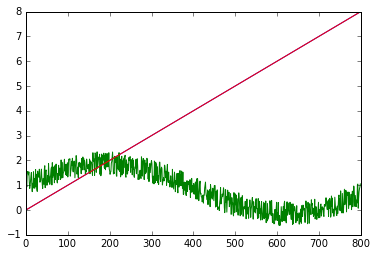

In [12]:
# Plot the graph of signal vs seconds.
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(wheel)



# Does it look linear?

In the following cell, we define the function that we think might be
the relationship between signal and seconds, but it has many parameters (a, b and c). 

The argument _t_ is where we will pass in "seconds"; the function returns a value that is hopefully equivalent to signal.

In [13]:
import math
def underlying_function(t, a,b,c):
    return math.sin(a * t + b) + c

We need a function that says how close a match a particular set of
parameters are: let's use the mean squared error to make sense of it.

In [14]:
import sklearn.metrics

def try_a_b_c(a,b,c):
    this_try = [underlying_function(w, a, b, c) for w in wheel.seconds]
    return sklearn.metrics.mean_squared_error(this_try, wheel.signal)

We don't need an exact derivative: a close approximation will do.

try_a_b_c is a function in three dimensions (a, b and c) so the gradient
is a 3-dimensional vector (which we store in a numpy array).

In [15]:
import numpy
def gradient_of_try_a_b_c(a, b, c, delta=0.0001):
    here = try_a_b_c(a,b,c)
    a_gradient = (try_a_b_c(a+delta, b, c) - here) / delta
    b_gradient = (try_a_b_c(a, b+delta, c) - here) / delta
    c_gradient = (try_a_b_c(a, b, c+delta) - here) / delta
    return numpy.array([a_gradient,b_gradient,c_gradient])

The following code implements gradient descent.

In [16]:
def gradient_descent(gradient_func, a0, b0, c0, l=0.01):
    vector = numpy.array([a0, b0, c0])
    g = gradient_func(a0, b0, c0)
    return vector - l * g

def gradient_descent_iterate(starting_point, 
                             gradient=gradient_of_try_a_b_c, 
                             n=10,
                             l=0.01):
    points = [starting_point]
    for i in range(n):
        (a,b,c) = points[-1]
        new_point = gradient_descent(gradient, a,b,c, l)
        points.append(new_point)
    return points

Pick a starting point: it doesn't matter much which point you choose.

In [36]:
import numpy
starting_point = numpy.array([  1 ,   5  , 7  ])

What's the value of try_a_b_c at this starting point?

In [19]:
try_a_b_c(1,5,7)

37.090625471223859

Iterate one step with gradient_descent_iterate. What does it suggest
is a better point (with a lower error)?

In [21]:
gradient_descent_iterate(starting_point, 
                             gradient=gradient_of_try_a_b_c, 
                             n=1,
                             l=0.01)

[array([1, 5, 7]), array([ 0.93729591,  4.98256396,  6.87885867])]

What's the value of try_a_b_c at this point?

In [22]:
try_a_b_c(0.93729591,4.98256396,6.87885867)

35.454490200334348

What about if you iterate 100 times? Or 1000 times? Try some different
learning rates.

In [27]:
gradient_descent_iterate(starting_point, 
                             gradient=gradient_of_try_a_b_c, 
                             n=1000,
                             l=0.01)

[array([1, 5, 7]),
 array([ 0.93729591,  4.98256396,  6.87885867]),
 array([ 0.94953031,  4.97485643,  6.76052008]),
 array([ 0.94829018,  4.96577785,  6.64455349]),
 array([ 0.95004322,  4.95734284,  6.53093148]),
 array([ 0.95117082,  4.94910026,  6.41960004]),
 array([ 0.95237925,  4.94113236,  6.31051395]),
 array([ 0.95354474,  4.93341892,  6.20362746]),
 array([ 0.95468719,  4.92595751,  6.098896  ]),
 array([ 0.95580443,  4.91874292,  5.99627586]),
 array([ 0.95689727,  4.91177039,  5.89572421]),
 array([ 0.95796616,  4.90503508,  5.7971991 ]),
 array([ 0.95901158,  4.89853223,  5.70065943]),
 array([ 0.96003401,  4.89225711,  5.60606492]),
 array([ 0.96103391,  4.88620501,  5.51337612]),
 array([ 0.96201175,  4.88037131,  5.42255438]),
 array([ 0.96296797,  4.87475141,  5.33356181]),
 array([ 0.96390303,  4.86934079,  5.24636131]),
 array([ 0.96481736,  4.86413498,  5.16091653]),
 array([ 0.96571139,  4.85912958,  5.07719185]),
 array([ 0.96658554,  4.85432027,  4.99515239]),
 

Try to guess the values of a, b and c . Evaluate try_a_b_c at this point

In [28]:
try_a_b_c(0.75396071,6.33861961,0.86127274)

0.085719497617359947

Use underlying_function with the a,b and c you found, and use it to 
make predictions for signal from seconds. Plot the results. How well does it compare?

In [32]:
predictions = [underlying_function(x, 0.75396071,6.33861961,0.86127274) for x in wheel.seconds]

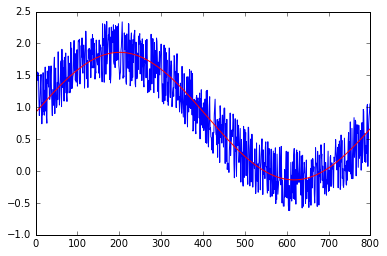

In [35]:
plt.plot(wheel.signal)
plt.plot(predictions,color='red')